## Regression - Predicting the Attrition Rate  

Introduction: You have been hired as a new data engineer at Analytixlabs. Your first major task is a data engineering project on employees of the one of the big corporation from the 1980s and 1995s. All that remain of the database of employees from that period are six CSV files. In this project, you will design the tables to hold data in the CSVs, import the CSVs into a SQL database, import to HDFS/Hive, and perform analysis using Hive/Impala/Spark/SparkML using the data and create pipelines.

This dataset contains 6 files which includes Employees. It includes employees who worked till 2013 only Definition of Target and Outcome Window: the company wants to predict the the employees who is likely leave Company so they want to predict the attrition Rate
    

In [1]:
from pyspark.sql import SparkSession

sparkSession = (SparkSession.builder.appName("shubham")\
                .config("hive.metastore.uris","thrift://ip-10-1-1-204.ap-south-1.compute.internal:3306")\
                .enableHiveSupport().getOrCreate())

In [2]:
sparkSession

In [5]:
import os
os.environ['PYSPARK_DRIVER_PYTHON'] = '/opt/anaconda3/bin/python3.7'
os.environ['PYSPARK_PYTHON'] = '/opt/anaconda3/bin/python3.7'
os.environ["SPARK_HOME"] = '/opt/cloudera/parcels/CDH/lib/spark'


import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession,SQLContext, Row

In [4]:
spark= (SparkSession.builder.appName("app_name").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate())

In [5]:
spark

In [6]:
spark = SparkSession.builder.appName("app_name").config("spark.sql.catalogImplementation=hive").enableHiveSupport().getOrCreate() 

In [7]:
spark

In [8]:
spark.sql("use shubham").show()

++
||
++
++



In [11]:
Employees=spark.sql("select * from Employees")

In [12]:
type(Employees)

pyspark.sql.dataframe.DataFrame

In [14]:
Employees.printSchema()

root
 |-- emp_no: long (nullable = true)
 |-- emp_titles_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left_job: integer (nullable = true)
 |-- last_date: string (nullable = true)



In [15]:
Employees.dtypes

[('emp_no', 'bigint'),
 ('emp_titles_id', 'string'),
 ('birth_date', 'string'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('sex', 'string'),
 ('hire_date', 'string'),
 ('no_of_projects', 'int'),
 ('last_performance_rating', 'string'),
 ('left_job', 'int'),
 ('last_date', 'string')]

In [352]:
Employees.show()

+------+-------------+----------+----------+-----------+---+----------+--------------+-----------------------+--------+----------+
|emp_no|emp_titles_id|birth_date|first_name|  last_name|sex| hire_date|no_of_projects|last_performance_rating|left_job| last_date|
+------+-------------+----------+----------+-----------+---+----------+--------------+-----------------------+--------+----------+
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
+------+-------------+----------+----------+-----------+---+----------+--------------+-----------------------+--------+----------+
only showing top 20 rows



In [16]:
Employees.count()

300024

In [9]:
Departments = spark.sql("select * from Departments")

In [10]:
Departments.show()

+-------+-------------------+
|dept_no|          dept_name|
+-------+-------------------+
|   d001|        "Marketing"|
|   d002|          "Finance"|
|   d003|  "Human Resources"|
|   d004|       "Production"|
|   d005|      "development"|
|   d006|"Quality Management|
|   d007|            "Sales"|
|   d008|         "Research"|
|   d009| "Customer Service"|
+-------+-------------------+



In [17]:
Salaries =spark.sql("Select * from Salaries")

In [18]:
Salaries.show()

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
| 10006| 40000|
| 10007| 56724|
| 10008| 46671|
| 10009| 60929|
| 10010| 72488|
| 10011| 42365|
| 10012| 40000|
| 10013| 40000|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10020| 40000|
+------+------+
only showing top 20 rows



In [19]:
Department_emoloyees =spark.sql("select * from Department_Employees")

In [20]:
Department_emoloyees.show()

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
| 10004|   d004|
| 10005|   d003|
| 10006|   d005|
| 10007|   d008|
| 10008|   d005|
| 10009|   d006|
| 10010|   d004|
| 10010|   d006|
| 10011|   d009|
| 10012|   d005|
| 10013|   d003|
| 10014|   d005|
| 10015|   d008|
| 10016|   d007|
| 10017|   d001|
| 10018|   d004|
| 10018|   d005|
+------+-------+
only showing top 20 rows



In [21]:
Department_emoloyees.printSchema()

root
 |-- emp_no: long (nullable = true)
 |-- dept_no: string (nullable = true)



In [22]:
Titles =spark.sql("Select * from Titles")

In [23]:
Titles.show()

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   s0001|             Staff|
|   s0002|      Senior Staff|
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
|   e0003|   Senior Engineer|
|   e0004|  Technique Leader|
|   m0001|           Manager|
+--------+------------------+



In [24]:
Department_managers=spark.sql("Select * from Department_managers")

In [25]:
Department_managers.show()

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
|   d002|110085|
|   d002|110114|
|   d003|110183|
|   d003|110228|
|   d004|110303|
|   d004|110344|
|   d004|110386|
|   d004|110420|
|   d005|110511|
|   d005|110567|
|   d006|110725|
|   d006|110765|
|   d006|110800|
|   d006|110854|
|   d007|111035|
|   d007|111133|
|   d008|111400|
|   d008|111534|
+-------+------+
only showing top 20 rows



In [89]:
data=spark.sql("select * from Employees1 as E inner join Department_Employees as DE on E.emp_no=DE.emp_no inner join Titles as T on E.emp_titles_id=T.title_id inner join Department_managers as DM on E.emp_no =DM.emp_no inner join Salaries as S on E.emp_no=S.emp_no inner join Departments as D on DM.dept_no =D.dept_no and DE.dept_no=D.dept_no  ")

In [27]:
data.printSchema()

root
 |-- emp_no: long (nullable = true)
 |-- emp_titles_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- hiring_year: integer (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left_job: integer (nullable = true)
 |-- last_date: string (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- salary: long (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- dept_name: string (nullable = true)



In [28]:
data.cache()

DataFrame[emp_no: bigint, emp_titles_id: string, birth_date: string, birth_year: int, first_name: string, last_name: string, sex: string, hire_date: string, hiring_year: int, no_of_projects: int, last_performance_rating: string, left_job: int, last_date: string, emp_no: bigint, dept_no: string, title_id: string, title: string, dept_no: string, emp_no: bigint, emp_no: bigint, salary: bigint, dept_no: string, dept_name: string]

In [29]:
data.createOrReplaceTempView("dat")

In [30]:
data.describe().show()

+-------+------------------+-------------+----------+-----------------+----------+---------+----+---------+------------------+-----------------+-----------------------+-------------------+---------+------------------+-------+--------+-------+-------+------------------+------------------+------------------+-------+------------------+
|summary|            emp_no|emp_titles_id|birth_date|       birth_year|first_name|last_name| sex|hire_date|       hiring_year|   no_of_projects|last_performance_rating|           left_job|last_date|            emp_no|dept_no|title_id|  title|dept_no|            emp_no|            emp_no|            salary|dept_no|         dept_name|
+-------+------------------+-------------+----------+-----------------+----------+---------+----+---------+------------------+-----------------+-----------------------+-------------------+---------+------------------+-------+--------+-------+-------+------------------+------------------+------------------+-------+---------------

In [31]:
data.columns

['emp_no',
 'emp_titles_id',
 'birth_date',
 'birth_year',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'hiring_year',
 'no_of_projects',
 'last_performance_rating',
 'left_job',
 'last_date',
 'emp_no',
 'dept_no',
 'title_id',
 'title',
 'dept_no',
 'emp_no',
 'emp_no',
 'salary',
 'dept_no',
 'dept_name']

In [32]:
data.select("E.emp_no","First_name","title","salary").show()

+------+-----------+-------+------+
|emp_no| First_name|  title|salary|
+------+-----------+-------+------+
|110022|  Margareta|Manager| 71166|
|110039|   Vishwani|Manager| 69941|
|110085|       Ebru|Manager| 60026|
|110114|      Isamu|Manager| 52070|
|110183|    Shirish|Manager| 48291|
|110228|    Karsten|Manager| 40000|
|110303|  Krassimir|Manager| 42093|
|110344|     Rosine|Manager| 50365|
|110386|       Shem|Manager| 40000|
|110420|      Oscar|Manager| 40000|
|110511|   DeForest|Manager| 48626|
|110567|       Leon|Manager| 40000|
|110725|  Peternela|Manager| 61357|
|110765|     Rutger|Manager| 40055|
|110800|     Sanjoy|Manager| 50457|
|110854|       Dung|Manager| 45169|
|111035|Przemyslawa|Manager| 71612|
|111133|      Hauke|Manager| 71148|
|111400|       Arie|Manager| 72446|
|111534|     Hilary|Manager| 48077|
+------+-----------+-------+------+
only showing top 20 rows



Exploring the data

--1. A list showing employee number, last name, first name, sex, and salary for each employee1.

In [33]:
spark.sql("""select E.emp_no,last_name,first_name,sex,S.Salary 
from Employees1 as E
inner join Salaries as S on E.emp_no = S.emp_no """).show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|Salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

--2.A list showing first name, last name, and hire date for employees who were hired in 1986.

In [35]:
spark.sql("""select first_name,last_name,hire_date
from Employees1 
where hiring_year=="1986" """).show()

+----------+------------+----------+
|first_name|   last_name| hire_date|
+----------+------------+----------+
|    Georgi|     Facello| 6/26/1986|
|     Parto|     Bamford| 8/28/1986|
| Chirstian|     Koblick| 12/1/1986|
|    Sanjiv|    Zschoche|  2/4/1986|
|      Kwee|    Schusler| 2/26/1986|
|   Kshitij|        Gils| 3/27/1986|
|  Zhongwei|       Rosen|10/30/1986|
|   Xinglin|     Eugenio|  9/8/1986|
| Sudharsan|Flasterstein| 8/12/1986|
|    Kendra|     Hofting| 3/14/1986|
|    Hilari|      Morton| 7/15/1986|
|     Akemi|       Birch| 12/2/1986|
|    Lunjin|      Giveon| 10/2/1986|
|    Xuejia|      Ullian| 8/22/1986|
|   Chikara|    Rissland| 1/23/1986|
|  Domenick|    Peltason| 3/14/1986|
|    Zissis|    Pintelas| 2/11/1986|
|     Perry|   Shimshoni| 9/18/1986|
|  Kazuhito| Encarnacion| 8/21/1986|
|   Xiadong|       Perry| 11/5/1986|
+----------+------------+----------+
only showing top 20 rows



--3. A list showing the manager of each department with the following information: department number, department name, --the manager's employee number, last name, first name.

In [36]:
spark.sql("""select E.emp_no,First_name,Last_name, DM.dept_no,D.dept_name
from Employees1 as E
inner join department_managers as DM on E.emp_no=DM.emp_no
inner join departments as D on DM.dept_no = D.dept_no """).show()

+------+-----------+------------+-------+-------------------+
|emp_no| First_name|   Last_name|dept_no|          dept_name|
+------+-----------+------------+-------+-------------------+
|110022|  Margareta|  Markovitch|   d001|        "Marketing"|
|110039|   Vishwani|    Minakawa|   d001|        "Marketing"|
|110085|       Ebru|       Alpin|   d002|          "Finance"|
|110114|      Isamu|  Legleitner|   d002|          "Finance"|
|110183|    Shirish|Ossenbruggen|   d003|  "Human Resources"|
|110228|    Karsten|     Sigstam|   d003|  "Human Resources"|
|110303|  Krassimir|     Wegerle|   d004|       "Production"|
|110344|     Rosine|       Cools|   d004|       "Production"|
|110386|       Shem|      Kieras|   d004|       "Production"|
|110420|      Oscar|    Ghazalie|   d004|       "Production"|
|110511|   DeForest|    Hagimont|   d005|      "development"|
|110567|       Leon|    DasSarma|   d005|      "development"|
|110725|  Peternela|     Onuegbe|   d006|"Quality Management|
|110765|

-4. A list showing the department of each employee with the following information: employee number, last name, first --name, and department name.

In [37]:
spark.sql("""select E.emp_no, first_name,last_name,D.dept_name
from Employees1 as E
inner join department_managers as DM on E.emp_no=DM.emp_no
inner join departments as D on DM.dept_no = D.dept_no""").show()

+------+-----------+------------+-------------------+
|emp_no| first_name|   last_name|          dept_name|
+------+-----------+------------+-------------------+
|110022|  Margareta|  Markovitch|        "Marketing"|
|110039|   Vishwani|    Minakawa|        "Marketing"|
|110085|       Ebru|       Alpin|          "Finance"|
|110114|      Isamu|  Legleitner|          "Finance"|
|110183|    Shirish|Ossenbruggen|  "Human Resources"|
|110228|    Karsten|     Sigstam|  "Human Resources"|
|110303|  Krassimir|     Wegerle|       "Production"|
|110344|     Rosine|       Cools|       "Production"|
|110386|       Shem|      Kieras|       "Production"|
|110420|      Oscar|    Ghazalie|       "Production"|
|110511|   DeForest|    Hagimont|      "development"|
|110567|       Leon|    DasSarma|      "development"|
|110725|  Peternela|     Onuegbe|"Quality Management|
|110765|     Rutger|     Hofmeyr|"Quality Management|
|110800|     Sanjoy|     Quadeer|"Quality Management|
|110854|       Dung|       P

--5. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [38]:
spark.sql("""select first_name,last_name,sex 
from Employees1 
where first_name like "Hercules%" and last_name like "B%" """).show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



--6. A list showing all employees in the Marketing department, including their employee number, last name, first name, and --department name.

In [41]:
spark.sql(""" select E.emp_no,First_name,Last_name,D.dept_name from Employees1 as E
inner join Department_managers as DM on E.emp_no=DM.emp_no
inner join Departments as D on DM.dept_no = D.dept_no
where D.dept_name like "%Marketing%" """).show()

+------+----------+----------+-----------+
|emp_no|First_name| Last_name|  dept_name|
+------+----------+----------+-----------+
|110022| Margareta|Markovitch|"Marketing"|
|110039|  Vishwani|  Minakawa|"Marketing"|
+------+----------+----------+-----------+



--7. A list showing all employees in the Marketing and development departments, including their employee number, last name, --first name, and department name

In [40]:
spark.sql("""select E.emp_no,First_name,Last_name,D.dept_name
from Employees1 as E
inner join Department_managers as DM on E.emp_no=DM.emp_no
inner join Departments as D on DM.dept_no = D.dept_no
where dept_name like "%Mar%" or dept_name like "%partm%" """).show()

+------+----------+----------+-----------+
|emp_no|First_name| Last_name|  dept_name|
+------+----------+----------+-----------+
|110022| Margareta|Markovitch|"Marketing"|
|110039|  Vishwani|  Minakawa|"Marketing"|
+------+----------+----------+-----------+



In [ ]:
--8. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each --last name

In [42]:
spark.sql("""select last_name,count(last_name) as no_of_common_last_name
from Employees1 
group by last_name
order by  no_of_common_last_name desc  """).show()

+-----------+----------------------+
|  last_name|no_of_common_last_name|
+-----------+----------------------+
|       Baba|                   226|
|     Gelosh|                   223|
|      Coorg|                   223|
|    Sudbeck|                   222|
|     Farris|                   222|
|     Adachi|                   221|
|     Osgood|                   220|
|     Neiman|                   218|
|    Mandell|                   218|
|     Masada|                   218|
|Boudaillier|                   217|
|    Wendorf|                   217|
|   Cummings|                   216|
|     Mahnke|                   216|
|     Pettis|                   216|
|    Solares|                   216|
|     Emmart|                   215|
|   Birjandi|                   215|
|   Collette|                   215|
|    Kulisch|                   215|
+-----------+----------------------+
only showing top 20 rows



--9. Histogram to show the salary distribution among the department

In [58]:
from pyspark.sql.functions import avg
a=spark.sql("select Dept_name as name ,ceiling(avg(salary)) as avg_salary from dat group by Dept_name")
b=a.toPandas()
b

,name,avg_salary
0,"""Production""",43115
1,"""development""",44313
2,"""Research""",60262
3,"""Sales""",71380
4,"""Finance""",56048
5,"""Human Resources""",44146
6,"""Marketing""",70554
7,"""Quality Management",49260
8,"""Customer Service""",43462


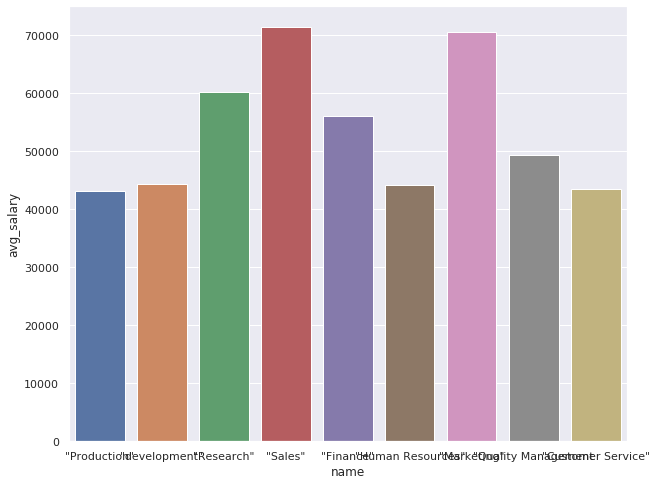

In [63]:
import seaborn as sn
sn.set(rc={"figure.figsize": (10,8)})
sn.barplot( data = b, x='name',y='avg_salary')

--10. Bar graph to show the Average salary per title (designation)

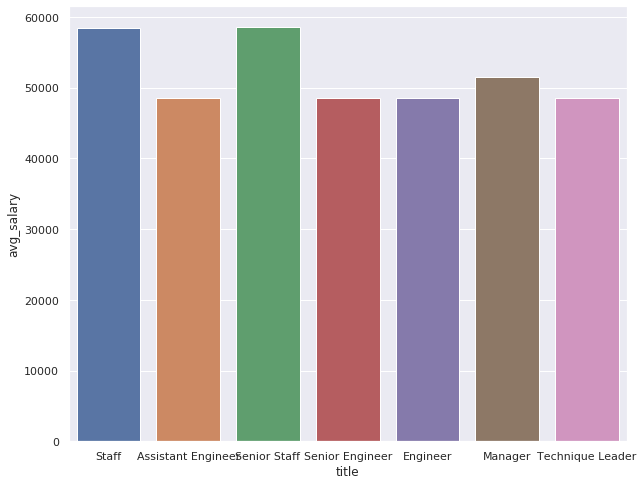

In [68]:
a=spark.sql("""select title, round(avg(Salary),2) as avg_salary
from Employees1 as E 
inner join Titles as T on E.emp_titles_id=T.title_id
inner join Salaries as S on E.emp_no =S.emp_no
group by title """)
b=a.toPandas()
import seaborn as sn
sn.set(rc={"figure.figsize": (10,8)})
sn.barplot( data = b, x='title',y='avg_salary')

--11. Calculate employee tenure & show the tenure distribution among the employees

In [46]:
spark.sql("""select emp_no,First_name,Last_name,cast(regexp_extract(hire_date, ". *. *. *. *$",0) as int) as hiring_year  ,(case when left_job ="0" then 0 else cast(regexp_extract(last_date, ". *. *. *. *$",0) as int) end) as last_year
,((case when left_job ="0" then cast(regexp_extract(hire_date, ". *. *. *. *$",0) as int) else cast(regexp_extract(last_date, ". *. *. *. *$",0) as int) end)-cast(regexp_extract(hire_date, ". *. *. *. *$",0) as int)) as tenure_in_years
from Employees """).show()

+------+----------+-----------+-----------+---------+---------------+
|emp_no|First_name|  Last_name|hiring_year|last_year|tenure_in_years|
+------+----------+-----------+-----------+---------+---------------+
| 10001|    Georgi|    Facello|       1986|     1994|              8|
| 10002|   Bezalel|     Simmel|       1985|        0|              0|
| 10003|     Parto|    Bamford|       1986|        0|              0|
| 10004| Chirstian|    Koblick|       1986|        0|              0|
| 10005|   Kyoichi|   Maliniak|       1989|        0|              0|
| 10006|    Anneke|    Preusig|       1989|        0|              0|
| 10007|   Tzvetan|  Zielinski|       1989|     2002|             13|
| 10008|    Saniya|   Kalloufi|       1994|        0|              0|
| 10009|    Sumant|       Peac|       1985|        0|              0|
| 10010| Duangkaew|   Piveteau|       1989|        0|              0|
| 10011|      Mary|      Sluis|       1990|        0|              0|
| 10012|  Patricio| 

--12. a list of employees who requires PIP

In [47]:
spark.sql("""select emp_no , First_name,Last_name,Last_performance_rating
from Employees 
where Last_performance_rating = "PIP" """).show()

+------+----------+---------+-----------------------+
|emp_no|First_name|Last_name|Last_performance_rating|
+------+----------+---------+-----------------------+
| 10026|  Yongqiao| Berztiss|                    PIP|
| 10066|      Kwee| Schusler|                    PIP|
| 10074|   Mokhtar|Bernatsky|                    PIP|
| 10114|     Munir|  Demeyer|                    PIP|
| 10141|    Shahaf|Ishibashi|                    PIP|
| 10155|      Adas|Nastansky|                    PIP|
| 10167| Duangkaew|  Rassart|                    PIP|
| 10173| Shrikanth|   Mahmud|                    PIP|
| 10177|  Pragnesh|   Iisaka|                    PIP|
| 10182| Moriyoshi|    Merey|                    PIP|
| 10187|   Tommaso| Narwekar|                    PIP|
| 10208|    Xiping|   Klerer|                    PIP|
| 10260|     Alper|    Suomi|                    PIP|
| 10276|    Xuejun|Hempstead|                    PIP|
| 10279|    Barton| Jumpertz|                    PIP|
| 10290|   Yongmao| Pleszkun

--13. trend of leaving job by year

In [48]:
spark.sql("""select (case when left_job ="0" then 0 else cast(regexp_extract(last_date, ". *. *. *. *$",0) as int) end) as last_year, count(emp_no) as no_of_employee_left
from Employees
group by (case when left_job ="0" then 0 else cast(regexp_extract(last_date, ". *. *. *. *$",0) as int) end) """).show()

+---------+-------------------+
|last_year|no_of_employee_left|
+---------+-------------------+
|     1990|               1131|
|     2003|               1133|
|     2007|                403|
|     2006|                552|
|     2013|                  1|
|     1988|                605|
|     1997|               2326|
|     1994|               1870|
|     2004|                921|
|     1991|               1375|
|     1996|               2220|
|     1989|                916|
|     1998|               2368|
|     2012|                 17|
|     1987|                305|
|     2009|                202|
|     1995|               2085|
|     2001|               1593|
|     1992|               1494|
|     2005|                738|
+---------+-------------------+
only showing top 20 rows



--14. trend of salary and year of experience /// considering the analysis is done on the max date which is 2013 in this data so i'm calculate on that

In [49]:
spark.sql("""select (2013-cast(regexp_extract(hire_date, ". *. *. *. *$",0) as int)) as year_of_experience , round(avg(salary),2) as Average_salary 
from Employees as E
inner join Salaries as S on E.emp_no =S.emp_no 
group by (2013-cast(regexp_extract(hire_date, ". *. *. *. *$",0) as int))  """).show()

+------------------+--------------+
|year_of_experience|Average_salary|
+------------------+--------------+
|                28|      53010.03|
|                27|      53032.65|
|                26|      52971.03|
|                22|      52876.87|
|                13|      52292.92|
|                16|      52888.21|
|                20|      53152.14|
|                19|      52994.96|
|                15|      53098.49|
|                17|      52934.81|
|                23|      52972.32|
|                25|      52834.38|
|                24|      53050.46|
|                21|      52902.19|
|                14|      53098.26|
|                18|      52843.51|
+------------------+--------------+



--15. Managers employees per department

In [53]:
spark.sql("""select dept_name,count(E.emp_no) 
from Employees as E
inner join department_managers as DM on E.emp_no =DM.emp_no
inner join departments as D on DM.dept_no =D.dept_no 
group by dept_name """).show()

+-------------------+-------------+
|          dept_name|count(emp_no)|
+-------------------+-------------+
|       "Production"|            4|
|      "development"|            2|
|         "Research"|            2|
|            "Sales"|            2|
|          "Finance"|            2|
|  "Human Resources"|            2|
|        "Marketing"|            2|
|"Quality Management|            4|
| "Customer Service"|            4|
+-------------------+-------------+



In [ ]:
--15. employees per department

In [55]:
spark.sql("""select dept_name,count(E.emp_no) 
from Employees as E
inner join department_Employees as DE on E.emp_no =DE.emp_no
inner join departments as D on DE.dept_no =D.dept_no 
group by dept_name """).show()

+-------------------+-------------+
|          dept_name|count(emp_no)|
+-------------------+-------------+
|       "Production"|        73485|
|      "development"|        85707|
|         "Research"|        21126|
|            "Sales"|        52245|
|          "Finance"|        17346|
|  "Human Resources"|        17786|
|        "Marketing"|        20211|
|"Quality Management|        20117|
| "Customer Service"|        23580|
+-------------------+-------------+



--16. Company gender ratio

In [56]:
spark.sql("""select sex, count(sex) from Employees group by sex """).show()

+---+----------+
|sex|count(sex)|
+---+----------+
|  F|    120051|
|  M|    179973|
+---+----------+



--17. no of employees currently

In [57]:
spark.sql("""select count(emp_no) from Employees where left_job =0""").show()

+-------------+
|count(emp_no)|
+-------------+
|       270157|
+-------------+



# Target variable is left job 


In [88]:
spark.sql("""select sex ,""")

root
 |-- emp_no: long (nullable = true)
 |-- emp_titles_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- hiring_year: integer (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left_job: integer (nullable = true)
 |-- last_date: string (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- salary: long (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- dept_name: string (nullable = true)



In [74]:
data.dropDuplicates()

DataFrame[emp_no: bigint, emp_titles_id: string, birth_date: string, birth_year: int, first_name: string, last_name: string, sex: string, hire_date: string, hiring_year: int, no_of_projects: int, last_performance_rating: string, left_job: int, last_date: string, emp_no: bigint, dept_no: string, title_id: string, title: string, dept_no: string, emp_no: bigint, emp_no: bigint, salary: bigint, dept_no: string, dept_name: string]

In [86]:
data.printSchema()

root
 |-- emp_no: long (nullable = true)
 |-- emp_titles_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- hiring_year: integer (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left_job: integer (nullable = true)
 |-- last_date: string (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- emp_no: long (nullable = true)
 |-- salary: long (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- dept_name: string (nullable = true)



In [90]:
x=data.toPandas().corr()

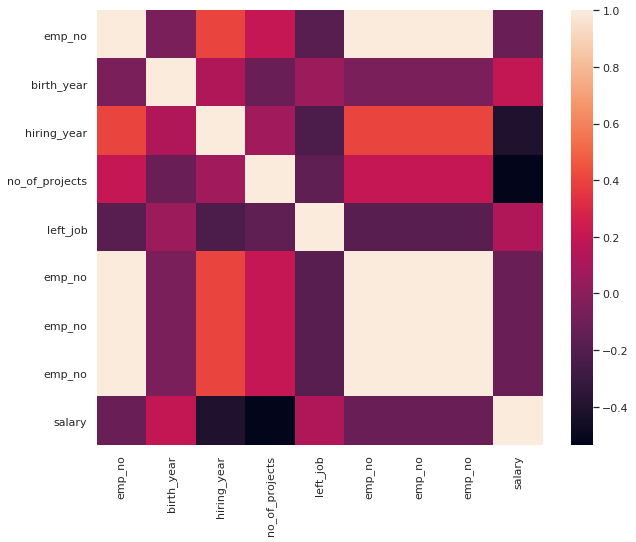

In [91]:
sn.heatmap(x)

In [217]:
data_df.count()

24

In [ ]:
 select sex, (2013-cast(regexp_extract(hire_date, ". *. *. *. *$",0) as int)) as year_of_experience 
           , no_of_projects,
           (case 
           when last_performance_rating =='A' then 5
           when last_performance_rating  =='B' then 4
           when last_performance_rating=='C' then 3.5
           when last_performance_rating =='S' then 3
           else 1 end)  as performance,salary, left_job 
            from Employees as 
             E inner join Salaries as S on E.emp_no=S.emp_no

In [383]:
data_df=spark.sql("""select sex, (2013-cast(regexp_extract(hire_date, ". *. *. *. *$",0) as int)) as year_of_experience 
           , no_of_projects,
           (case 
           when last_performance_rating =='S' then 5
           when last_performance_rating  =='A' then 4
           when last_performance_rating=='B' then 3
           when last_performance_rating =='C' then 2
           else 1 end) as performance,salary, left_job from Employees as  E inner join Salaries as S on E.emp_no=S.emp_no""")

In [384]:
data_df1 =data_df  #copy

In [386]:
df2 =data_df1 #testing something 

In [403]:
df3 =data_df1

here target variable will left_job 
so these are variables that are chosen X as Looking at the data of only those who left tell an interesting story

In [307]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import *
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

PREPROCESSING DATA
We are combining features into one single vector and renaming 'Left_job' to 'label'

In [308]:
data_df1.printSchema()

root
 |-- sex: string (nullable = true)
 |-- year_of_experience: integer (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- performance: decimal(11,1) (nullable = false)
 |-- salary: long (nullable = true)
 |-- left_job: integer (nullable = true)



In [309]:
df=data_df1

In [370]:
df2=data_df1

In [310]:
df.printSchema()

root
 |-- sex: string (nullable = true)
 |-- year_of_experience: integer (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- performance: decimal(11,1) (nullable = false)
 |-- salary: long (nullable = true)
 |-- left_job: integer (nullable = true)



In [414]:
df4 =data_df1

In [265]:
df.count()

300024

Training Model
We are creating a train function to reduce code repeating

In [425]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

categoricalColumns = ['sex']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'left_job', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['salary','year_of_experience','no_of_projects','performance']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=10)
stages +=[rf]


In [443]:
#stages

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)

In [ ]:
train, test = df4.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Tunning the RandomForest for Best accuracy

In [432]:
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [10, 30]).build()

crossval = CrossValidator(estimator=pipeline,estimatorParamMaps=paramGrid,evaluator=BinaryClassificationEvaluator(),numFolds=2) 

pred_train = crossval.fit(train).transform(train)
pred_test = crossval.fit(test).transform(test)

In [436]:
a=cvModel.transform(train) # a is Train_df

+---+------------------+--------------+-----------+------+--------+--------+-----------+-----+--------------------+--------------------+--------------------+----------+
|sex|year_of_experience|no_of_projects|performance|salary|left_job|sexIndex|sexclassVec|label|            features|       rawPrediction|         probability|prediction|
+---+------------------+--------------+-----------+------+--------+--------+-----------+-----+--------------------+--------------------+--------------------+----------+
|  F|                13|             1|          3| 59167|       0|     1.0|  (1,[],[])|  0.0|[0.0,59167.0,13.0...|[8.35658269272282...|[0.83565826927228...|       0.0|
|  F|                13|             2|          3| 75663|       0|     1.0|  (1,[],[])|  0.0|[0.0,75663.0,13.0...|[9.03733891206877...|[0.90373389120687...|       0.0|
|  F|                13|             3|          4| 65611|       1|     1.0|  (1,[],[])|  1.0|[0.0,65611.0,13.0...|[9.03733891206877...|[0.90373389120687..

In [437]:
b=crossval.fit(test).transform(test)

In [438]:
b.show() # b is test_df

+---+------------------+--------------+-----------+------+--------+--------+-----------+-----+--------------------+--------------------+--------------------+----------+
|sex|year_of_experience|no_of_projects|performance|salary|left_job|sexIndex|sexclassVec|label|            features|       rawPrediction|         probability|prediction|
+---+------------------+--------------+-----------+------+--------+--------+-----------+-----+--------------------+--------------------+--------------------+----------+
|  F|                13|             4|          4| 48413|       0|     1.0|  (1,[],[])|  0.0|[0.0,48413.0,13.0...|[26.7437359816782...|[0.89145786605594...|       0.0|
|  F|                13|             5|          3| 40000|       0|     1.0|  (1,[],[])|  0.0|[0.0,40000.0,13.0...|[27.0521905193621...|[0.90173968397873...|       0.0|
|  F|                14|             1|          2| 40000|       1|     1.0|  (1,[],[])|  1.0|[0.0,40000.0,14.0...|[26.2488258366331...|[0.87496086122110..

In [441]:
evaluator = BinaryClassificationEvaluator()
print("Train Area Under ROC: " + str(evaluator.evaluate(a, {evaluator.metricName: "areaUnderROC"}))) #traindatset

Train Area Under ROC: 0.5091308497664071


In [442]:
eval_accuracy = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="accuracy"))
eval_precision = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedPrecision"))
  
eval_recall = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedRecall"))
  
eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="f1"))

accuracy = eval_accuracy.evaluate(a)
accuracy1 = eval_accuracy.evaluate(a)

precision =  eval_precision.evaluate(a)
recall =  eval_recall.evaluate(a)

f1 =  eval_f1.evaluate(a)  # train dataset

print(f"""
  Accuracy  = {accuracy}
  Error     = {1-accuracy}
  Precision = {precision}
  Recall    = {recall}
  F1        = {f1}""")


  Accuracy  = 0.9010490461265439
  Error     = 0.0989509538734561
  Precision = 0.8118893835255546
  Recall    = 0.9010490461265439
  F1        = 0.8541488029252149


Roc is the criteria for RF on based on probability this is the cutoff for predictions

In [439]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(b, {evaluator.metricName: "areaUnderROC"}))) #test

Test Area Under ROC: 0.5193200841333179


In [440]:
eval_accuracy = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="accuracy"))
eval_precision = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedPrecision"))
  
eval_recall = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedRecall"))
  
eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="f1"))

accuracy = eval_accuracy.evaluate(b)
accuracy1 = eval_accuracy.evaluate(b)

precision =  eval_precision.evaluate(b)
recall =  eval_recall.evaluate(b)

f1 =  eval_f1.evaluate(b)  # test dataset

print(f"""
  Accuracy  = {accuracy}
  Error     = {1-accuracy}
  Precision = {precision}
  Recall    = {recall}
  F1        = {f1}""")



  Accuracy  = 0.8990653171837841
  Error     = 0.10093468281621587
  Precision = 0.8083184445627782
  Recall    = 0.8990653171837841
  F1        = 0.8512802979957244


here accuracy of train data is more than test data so it overfitting
hence we require more data to predict and add many features like titles,departmentname and managers but by joining them i'm getting less no of observations so i simply stick to where dataset is large
its always better to have train data accuracy greater than test data accuracy because when more data comes in pipeline we dont want the model to be overfitting.

Here Roc means the cutoff for which my model  is prediction that these guys are likly to leave and stay in company
factors like salary,sex,no of project,last-year performance index